## https://github.com/FinanceData/FinanceDataReader

In [1]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.10'

In [2]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [3]:
# 데이터 프레임의 메타 정보 확인

df_krx.info()
print(df_krx.shape)
print(df_krx.ndim)
print(df_krx.size)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 0 to 2584
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          2585 non-null   object        
 1   Market          2585 non-null   object        
 2   Name            2585 non-null   object        
 3   Sector          2383 non-null   object        
 4   Industry        2363 non-null   object        
 5   ListingDate     2383 non-null   datetime64[ns]
 6   SettleMonth     2383 non-null   object        
 7   Representative  2383 non-null   object        
 8   HomePage        2213 non-null   object        
 9   Region          2383 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 222.1+ KB
(2585, 10)
2
25850


## 데이터프레임 결측값 확인

In [4]:
df_krx['isna'] = df_krx.isna()['Industry']
df_krx.info()
d = df_krx[df_krx['isna'] == True]
d.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 0 to 2584
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          2585 non-null   object        
 1   Market          2585 non-null   object        
 2   Name            2585 non-null   object        
 3   Sector          2383 non-null   object        
 4   Industry        2363 non-null   object        
 5   ListingDate     2383 non-null   datetime64[ns]
 6   SettleMonth     2383 non-null   object        
 7   Representative  2383 non-null   object        
 8   HomePage        2213 non-null   object        
 9   Region          2383 non-null   object        
 10  isna            2585 non-null   bool          
dtypes: bool(1), datetime64[ns](1), object(9)
memory usage: 224.7+ KB


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,isna
10,001465,KOSPI,BYC우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
14,00104K,KOSPI,CJ4우(전환),NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
17,011155,KOSPI,CJ씨푸드1우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
18,001045,KOSPI,CJ우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
20,097955,KOSPI,CJ제일제당 우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True


In [5]:
import numpy as np

df_krx['Industry'] = np.where(df_krx['isna'] == True, df_krx['Sector'], df_krx['Industry'])

### 종목코드

In [6]:
# 삼성전자 종목코드 : 005930
df_005930 = fdr.DataReader('005930', '2019', '2020')
df_005930.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273
2019-12-27,55700,56900,55500,56500,12313056,0.019856
2019-12-30,56200,56600,55700,55800,8356767,-0.012389


In [7]:
df_005930.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2019-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    246 non-null    int64  
 1   High    246 non-null    int64  
 2   Low     246 non-null    int64  
 3   Close   246 non-null    int64  
 4   Volume  246 non-null    int64  
 5   Change  246 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 13.5 KB


In [8]:
df_005930.describe()

,Open,High,Low,Close,Volume,Change
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000
mean,46563.414634,46989.024390,46122.154472,46583.333333,1.089653e+07,0.001593
std,3799.192036,3788.349684,3773.149909,3776.215397,4.095583e+06,0.014517
min,37450.000000,37600.000000,36850.000000,37450.000000,4.406531e+06,-0.040678
25%,44012.500000,44362.500000,43650.000000,44000.000000,8.045918e+06,-0.007418
50%,46000.000000,46375.000000,45475.000000,46025.000000,9.871402e+06,0.001120
75%,48762.500000,49237.500000,48487.500000,49012.500000,1.259267e+07,0.010540
max,57000.000000,57300.000000,56000.000000,56700.000000,2.917870e+07,0.040863


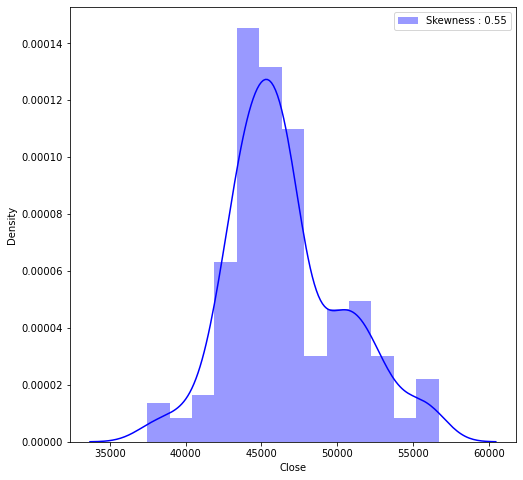

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

flg, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_005930['Close'], color='b', 
                label='Skewness : {:.2f}'.format(df_005930['Close'].skew()), ax=ax)
g = g.legend(loc='best')

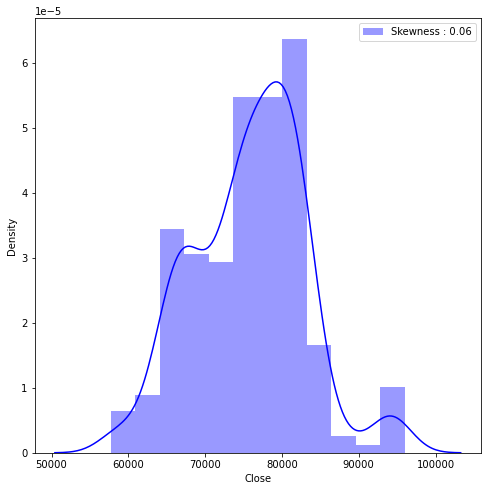

In [10]:
df_000660 = fdr.DataReader('000660', '2019', '2020')
df_000660.describe()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_000660['Close'], color='b', 
            label='Skewness : {:.2f}'.format(df_000660['Close'].skew()), ax=ax)
g = g.legend(loc='best')
plt.show()

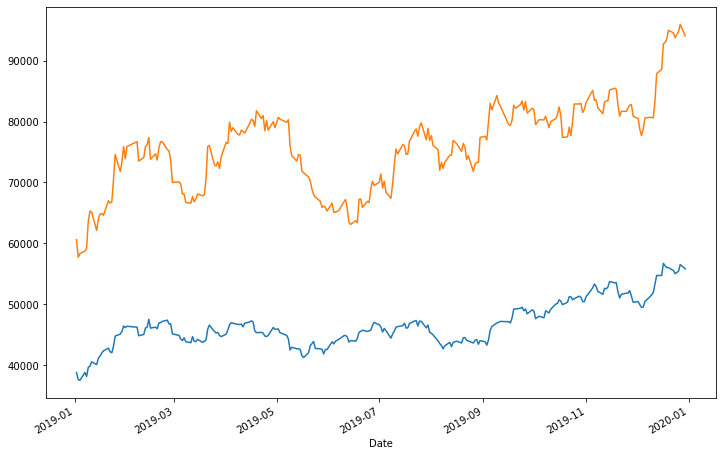

In [11]:
fig, ax = plt.subplots(1, 1)
ax = df_005930['Close'].plot(figsize=(12,8))
ax = df_000660['Close'].plot(figsize=(12,8))

plt.show()

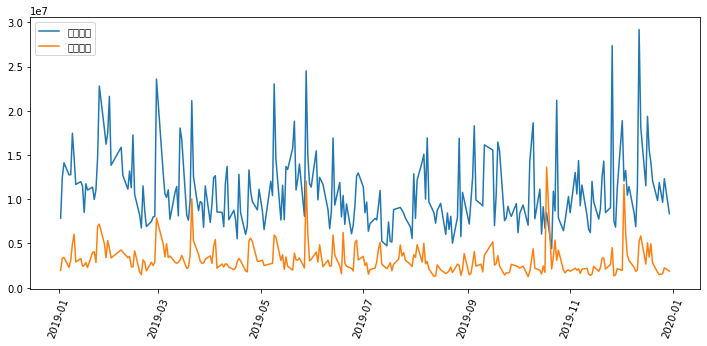

In [12]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
plt.plot(df_005930.index, df_005930['Volume'], label="삼성전자")
plt.plot(df_000660.index, df_000660['Volume'], label="하이닉스")
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='Date'>

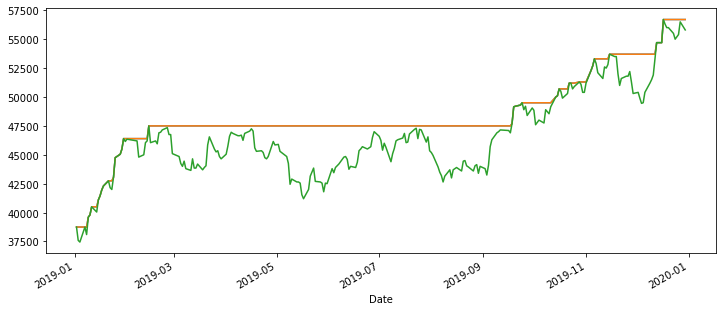

In [13]:
df_cummax_005930 = df_005930['Close'].cummax()
df_cummax_005930.plot(figsize=(12,5))

ax1 = plt.subplot(1, 1, 1)
df_cummax_005930.plot(ax=ax1)
df_005930['Close'].plot(figsize = (12,5), ax=ax1)

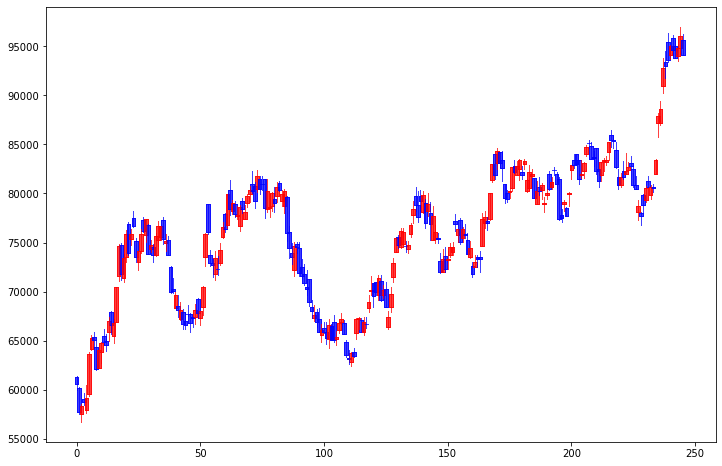

In [17]:
# 캔들 차트를 그리기 위한 모듈
%matplotlib inline

import mpl_finance
import matplotlib.pyplot as plt 
import seaborn as sns

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, 
                            df_000660['Open'], df_000660['High'], 
                            df_000660['Low'], df_000660['Close'],
                            width=1.5, colorup='r', colordown='b' )
fig.show()

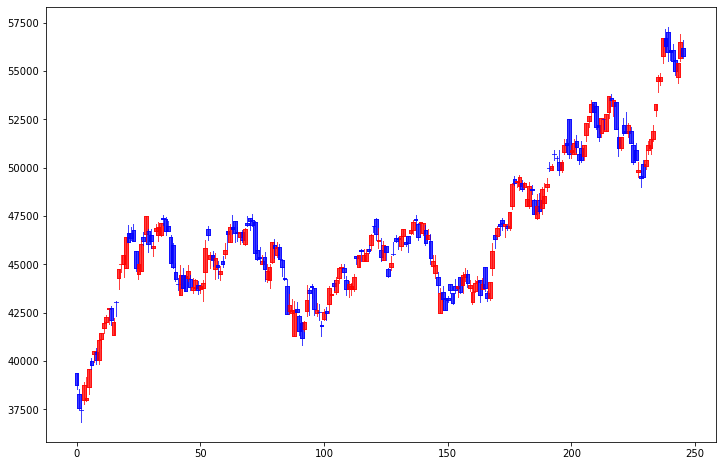

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, 
                            df_005930['Open'], df_005930['High'], 
                            df_005930['Low'], df_005930['Close'],
                            width=1.5, colorup='r', colordown='b' )
fig.show()

In [25]:
# 이동 평균 계산

df_005930['20d'] = np.round(df_005930["Close"].rolling(window=20).mean(), 2)
df_005930['60d'] = np.round(df_005930["Close"].rolling(window=60).mean(), 2)
df_005930['120d'] = np.round(df_005930["Close"].rolling(window=120).mean(), 2)
df_005930['20-60'] = df_005930['20d'] - df_005930['60d']
df_005930['20-120'] = df_005930['20d'] - df_005930['120d']
df_005930.tail()

,Open,High,Low,Close,Volume,Change,20d,60d,120d,20-120,20-60
Date,,,,,,,,,,,
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,52652.5,51485.00,48560.42,4092.08,1167.50
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,52812.5,51595.00,48633.33,4179.17,1217.50
2019-12-26,54700,55400,54400,55400,9645034,0.007273,52972.5,51700.83,48716.67,4255.83,1271.67
2019-12-27,55700,56900,55500,56500,12313056,0.019856,53232.5,51828.33,48804.17,4428.33,1404.17
2019-12-30,56200,56600,55700,55800,8356767,-0.012389,53507.5,51965.00,48888.75,4618.75,1542.50


<AxesSubplot:xlabel='Date'>

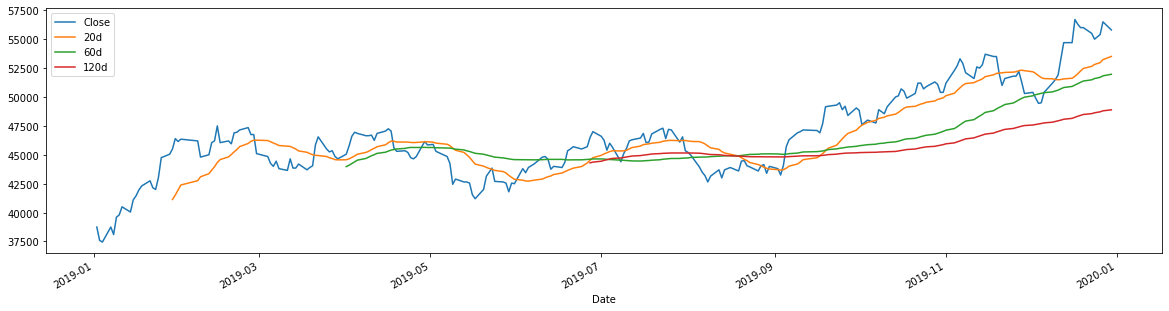

In [27]:
# 종가와 평균에 대한 선 그래프 생성

df_005930[['Close','20d','60d','120d']].plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

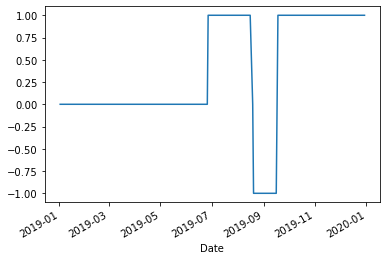

In [29]:
SD = 65

df_005930['매매구간'] = np.where(df_005930['20-120'] > SD, 1, 0)
df_005930['매매구간'] = np.where(df_005930['20-120'] < -SD, -1, df_005930['매매구간'])
df_005930['매매구간'].plot(lw=1.5)

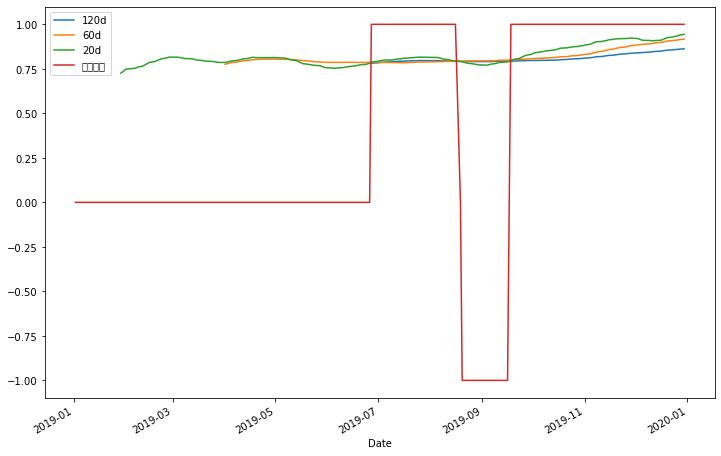

In [33]:
fig = plt.figure(figsize=(12,8))
ax3 = fig.add_subplot(111)
(df_005930['120d']/df_005930['Close'].max()).plot(ax=ax3)
(df_005930['60d']/df_005930['Close'].max()).plot(ax=ax3)
(df_005930['20d']/df_005930['Close'].max()).plot(ax=ax3)
df_005930['매매구간'].plot(ax=ax3)
plt.legend()